## **Project - STOCK MARKET PREDICTION** ##

## ***Objectives** : In this Model we are going to predict the Closing price of Various Stock depends upon the various features* ##

## *These are the explanation of few terms of the columns present in the dataset:* ##

**Date:** The date of the data entry.

**Close:** The closing price of a particular stock or index on that date.

**Volume:** The trading volume (number of shares or contracts traded) on that date

**Momentum (MOM)**: Different measures of price momentum on various time scales or simply you can say that return of the stock

**Rate of Change (ROC)**: Rate of change in price over different periods.

**Exponential Moving Averages (EMA)**: Various EMA indicators, which are commonly used to analyze trends.

**Individual Stock Prices (AAPL, AMZN, GE, JNJ, JPM, MSFT, WFC, XOM):** Prices of specific stocks.

**Name:** Likely the name of the stock or financial instrument.

**EMA_20** (Exponential Moving Average with a 20-day period): EMA is a commonly used technical indicator that calculates the average of a stock's closing prices over a specified time period, giving more weight to recent prices. EMA_20 represents the 20-day

**DE4:** In financial analysis, DE usually stands for "Debt to Equity Ratio"

**DTB6:** DTB6 refers to the "6-Month Treasury Bill Yield." Treasury bills are short-term debt securities issued by the government. DTB6 represents the yield or interest rate on a 6-month Treasury bill and is used as a benchmark for short-term interest rates and risk-free returns in financial analysis.

**DBAA** : Moody's Seasoned Baa Corporate Bond Yield

**TE6**: Secondary Market Rate

# *Importing the various packages* #

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
from sklearn.feature_selection import SelectKBest, f_regression

# *Loading datasets* #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_NASDAQ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Processed_NASDAQ.csv", parse_dates=['Date'])
dataset_NYSE = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Processed_NYSE.csv", parse_dates=['Date'])
dataset_SP = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Processed_S&P.csv", parse_dates=['Date'])
dataset_DJI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Processed_DJI.csv", parse_dates=['Date'])
dataset_RUSSELL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Processed_RUSSELL.csv", parse_dates=['Date'])

In [ ]:
dataset_NASDAQ = dataset_NASDAQ.dropna(how='any')
dataset_NYSE = dataset_NYSE.dropna(how='any')
dataset_SP = dataset_SP.dropna(how='any')
dataset_DJI = dataset_DJI.dropna(how='any')
dataset_RUSSELL = dataset_RUSSELL.dropna(how='any')

In [ ]:
dataset_NASDAQ.shape

(1114, 84)

In [ ]:
dataset_NYSE.shape

(1114, 84)

In [ ]:
dataset_RUSSELL.shape

(1114, 84)

In [ ]:
data = pd.concat([dataset_NASDAQ, dataset_NYSE, dataset_SP, dataset_DJI, dataset_RUSSELL], ignore_index = True)

In [ ]:
data.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,IXIC,S&P
0,2010-10-19,2436.949951,0.299836,-0.017620,0.004816,0.013710,-0.002396,0.787041,1.546771,2.410493,...,-1.74,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51,NaN,NaN
1,2010-10-20,2457.389893,-0.100395,0.008388,-0.017620,0.004816,0.013710,0.661958,3.223055,3.401127,...,0.91,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82,NaN,NaN
2,2010-10-21,2459.669922,0.058861,0.000928,0.008388,-0.017620,0.004816,0.997382,3.188361,3.844002,...,-0.53,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55,NaN,NaN
3,2010-10-26,2497.290039,0.096219,0.002585,0.004622,0.008017,0.000928,2.476050,3.282578,4.061119,...,-0.23,0.00,1.17,0.79,0.79,3.65,0.85,-0.04,NaN,NaN
4,2010-10-27,2503.260010,0.051657,0.002391,0.002585,0.004622,0.008017,1.866619,2.540933,5.149837,...,-0.26,-0.34,0.47,0.60,0.57,0.61,-1.22,-1.09,NaN,NaN


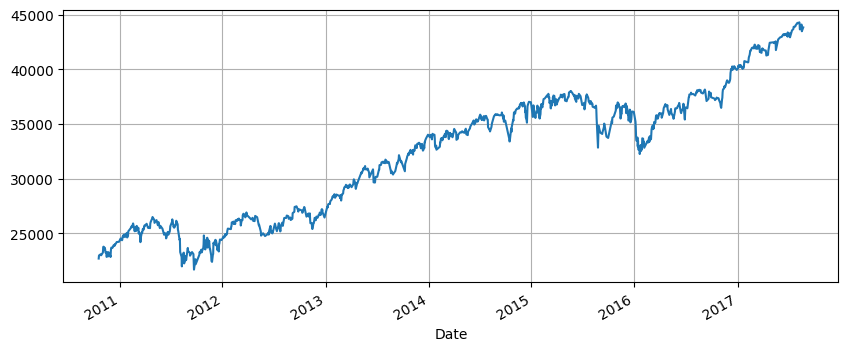

In [ ]:
plt.figure(figsize=(10,4))
data.groupby('Date')['Close'].sum().plot(kind='line')
plt.grid()
plt.show()

In [ ]:
data.shape

(5570, 86)

# *Data Cleaning* #

In [ ]:
columns_to_drop = ['S&P', 'IXIC','Name', 'Date']
data = data.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
data.shape

(5570, 82)

In [ ]:
data.isna().sum()       # checking that the null values are present or not

Close             0
Volume            0
mom               0
mom1              0
mom2              0
                 ..
Dollar index-F    0
Dollar index      0
wheat-F           0
XAG               0
XAU               0
Length: 82, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           5570 non-null   float64
 1   Volume          5570 non-null   float64
 2   mom             5570 non-null   float64
 3   mom1            5570 non-null   float64
 4   mom2            5570 non-null   float64
 5   mom3            5570 non-null   float64
 6   ROC_5           5570 non-null   float64
 7   ROC_10          5570 non-null   float64
 8   ROC_15          5570 non-null   float64
 9   ROC_20          5570 non-null   float64
 10  EMA_10          5570 non-null   float64
 11  EMA_20          5570 non-null   float64
 12  EMA_50          5570 non-null   float64
 13  EMA_200         5570 non-null   float64
 14  DTB4WK          5570 non-null   float64
 15  DTB3            5570 non-null   float64
 16  DTB6            5570 non-null   float64
 17  DGS5            5570 non-null   f

In [ ]:
data_no_outliers = data

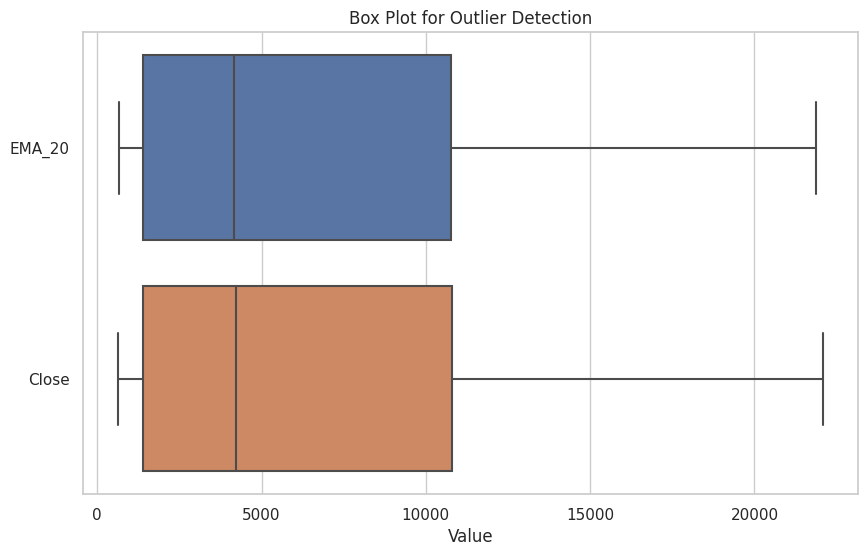

In [ ]:
selected_columns = ['EMA_20','Close']
sns.set(style="whitegrid")  # Set the style of the plot

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers[selected_columns], orient="h")
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Value")
plt.show()


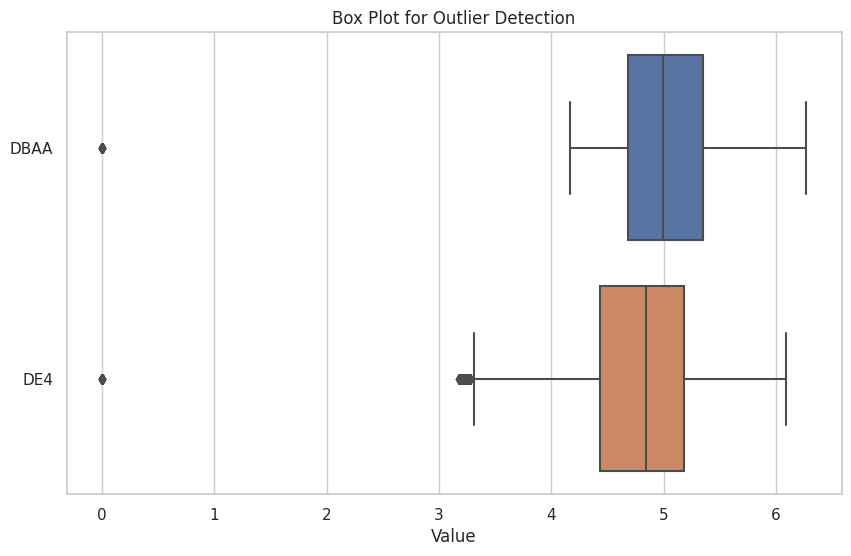

In [ ]:
selected_columns = ['DBAA','DE4']
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers[selected_columns], orient="h")
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Value")
plt.show()


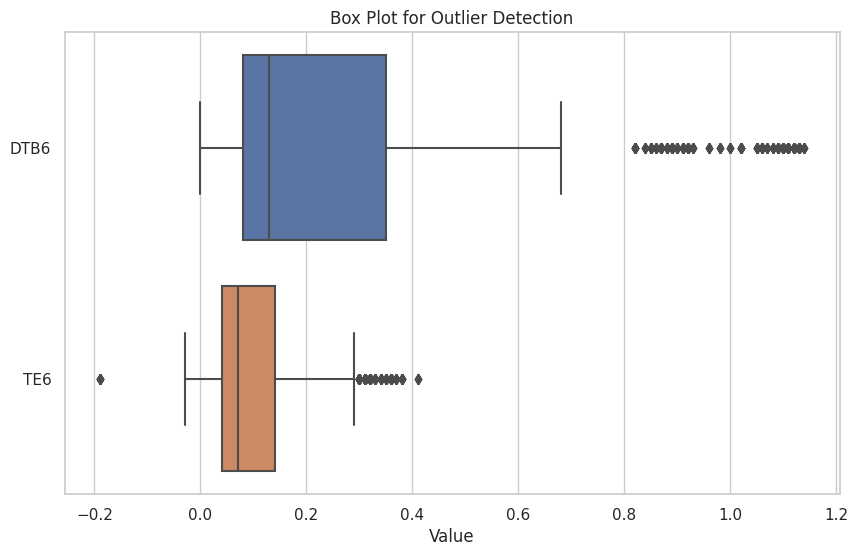

In [ ]:
selected_columns = ['DTB6', 'TE6']
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers[selected_columns], orient="h")
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Value")
plt.show()


## *Removing outliers from the data* #

In [ ]:
# Handle missing data
data.dropna(inplace=True)

# We are using z-score method for detecting and removing outliers
z_scores = np.abs((data - data.mean()) / data.std())
data_no_outliers = data[(z_scores < 3).all(axis=1)]

# Verify the dataset after data preprocessing
print("\nProcessed dataset info:")
print(data_no_outliers.info())


Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 1074
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           767 non-null    float64
 1   Volume          767 non-null    float64
 2   mom             767 non-null    float64
 3   mom1            767 non-null    float64
 4   mom2            767 non-null    float64
 5   mom3            767 non-null    float64
 6   ROC_5           767 non-null    float64
 7   ROC_10          767 non-null    float64
 8   ROC_15          767 non-null    float64
 9   ROC_20          767 non-null    float64
 10  EMA_10          767 non-null    float64
 11  EMA_20          767 non-null    float64
 12  EMA_50          767 non-null    float64
 13  EMA_200         767 non-null    float64
 14  DTB4WK          767 non-null    float64
 15  DTB3            767 non-null    float64
 16  DTB6            767 non-null    float64
 17  DGS5     

In [ ]:
data_no_outliers.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,...,767.000000,767.00000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,4020.434247,0.015062,0.001248,0.000869,0.001100,0.001225,0.510828,0.957830,1.467022,1.884179,...,0.011956,0.00060,0.133572,0.112960,0.008774,0.010430,0.006584,-0.015346,0.039791,-0.020730
std,999.965778,0.136325,0.007831,0.008549,0.008710,0.008734,1.810743,2.425379,2.890653,3.321774,...,0.679525,1.65185,0.967812,0.692413,0.551757,0.440396,0.434605,1.576123,1.515887,0.871084
min,2457.389893,-0.618277,-0.026469,-0.029396,-0.028852,-0.030260,-5.045878,-7.043662,-7.766321,-8.520332,...,-1.920000,-5.46000,-2.960000,-2.410000,-1.950000,-1.420000,-1.460000,-5.310000,-5.110000,-2.620000
25%,2995.909912,-0.055477,-0.003298,-0.003601,-0.003709,-0.003234,-0.506871,-0.617817,-0.454237,0.093741,...,-0.430000,-0.82500,-0.450000,-0.260000,-0.300000,-0.270000,-0.255000,-1.085000,-0.760000,-0.510000
50%,4155.759766,0.008446,0.001450,0.000911,0.000904,0.001607,0.637863,1.013044,1.545579,1.934580,...,-0.010000,-0.03000,0.180000,0.090000,0.010000,0.010000,0.000000,-0.060000,0.000000,-0.020000
75%,4889.750000,0.083623,0.005987,0.005915,0.006243,0.006027,1.647103,2.499685,3.371208,3.890144,...,0.460000,0.87000,0.750000,0.510000,0.335000,0.260000,0.260000,1.015000,0.820000,0.500000
max,6025.490234,0.802018,0.024564,0.030362,0.028884,0.030717,5.581649,8.410373,10.550670,11.352530,...,2.210000,5.74000,3.460000,2.520000,1.980000,1.470000,1.430000,4.790000,5.360000,2.970000


In [ ]:
data_no_outliers.shape

(767, 82)

## *Since we have the lot of column features, so we have to reduce it which is also known as dimenionality reduction* #

## *We are using **SelectKBest**  * method from scikit-learn to select the top K features based on statistical tests.* ##

In [ ]:

x = data_no_outliers.drop(columns=['Close'])
y = data_no_outliers['Close']

# Select the top K features using SelectKBest and a suitable scoring function
K = 10
selector = SelectKBest(score_func=f_regression, k=K)
x_new = selector.fit_transform(x, y)

selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_indices]

selected_data = pd.DataFrame(data=x_new, columns=selected_features)

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB6', 'DBAA', 'TE6', 'DE4',
       'DE5', 'DE6'],
      dtype='object')


In [ ]:
selected_data.head()

,EMA_10,EMA_20,EMA_50,EMA_200,DTB6,DBAA,TE6,DE4,DE5,DE6
0,2434.081342,2400.444582,2334.948907,2297.772346,0.17,5.74,0.03,5.57,5.60,5.60
1,2438.733811,2406.085091,2339.839927,2299.383267,0.18,5.77,0.05,5.59,5.64,5.64
2,2462.081608,2427.790232,2356.755919,2304.994319,0.18,5.80,0.04,5.62,5.66,5.66
3,2469.568590,2434.977830,2362.501177,2306.967112,0.18,5.84,0.04,5.66,5.70,5.70
4,2494.813306,2461.135875,2384.855185,2315.060752,0.16,5.71,0.03,5.55,5.58,5.58


In [ ]:
selected_data.shape

(767, 10)

In [ ]:
selected_data.head()

,EMA_10,EMA_20,EMA_50,EMA_200,DTB6,DBAA,TE6,DE4,DE5,DE6
0,2434.081342,2400.444582,2334.948907,2297.772346,0.17,5.74,0.03,5.57,5.60,5.60
1,2438.733811,2406.085091,2339.839927,2299.383267,0.18,5.77,0.05,5.59,5.64,5.64
2,2462.081608,2427.790232,2356.755919,2304.994319,0.18,5.80,0.04,5.62,5.66,5.66
3,2469.568590,2434.977830,2362.501177,2306.967112,0.18,5.84,0.04,5.66,5.70,5.70
4,2494.813306,2461.135875,2384.855185,2315.060752,0.16,5.71,0.03,5.55,5.58,5.58


## *Creation of subplots for the selected features

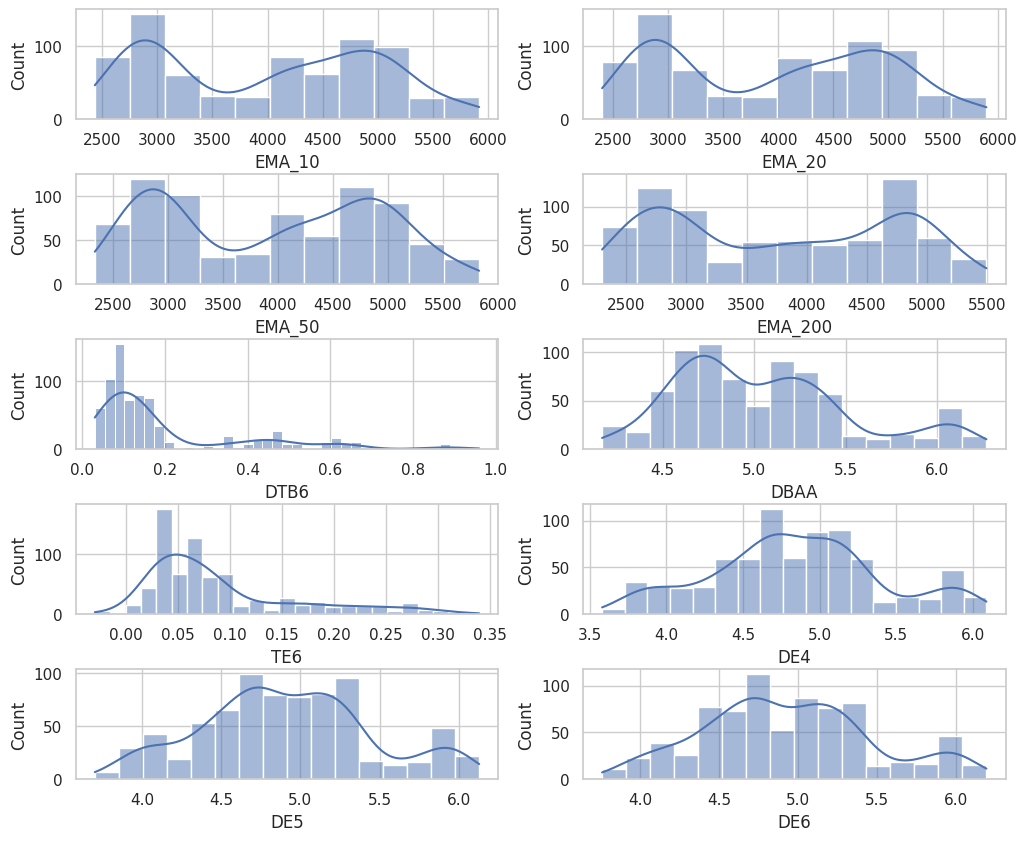

In [ ]:
selected_features = ['EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB6', 'DBAA', 'TE6', 'DE4', 'DE5', 'DE6']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(selected_features):
    row, col = i // 2, i % 2
    sns.histplot(selected_data[feature], ax=axes[row, col], kde=True)
    # axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)

plt.show()


In [ ]:
selected_data['Close'] = data['Close']

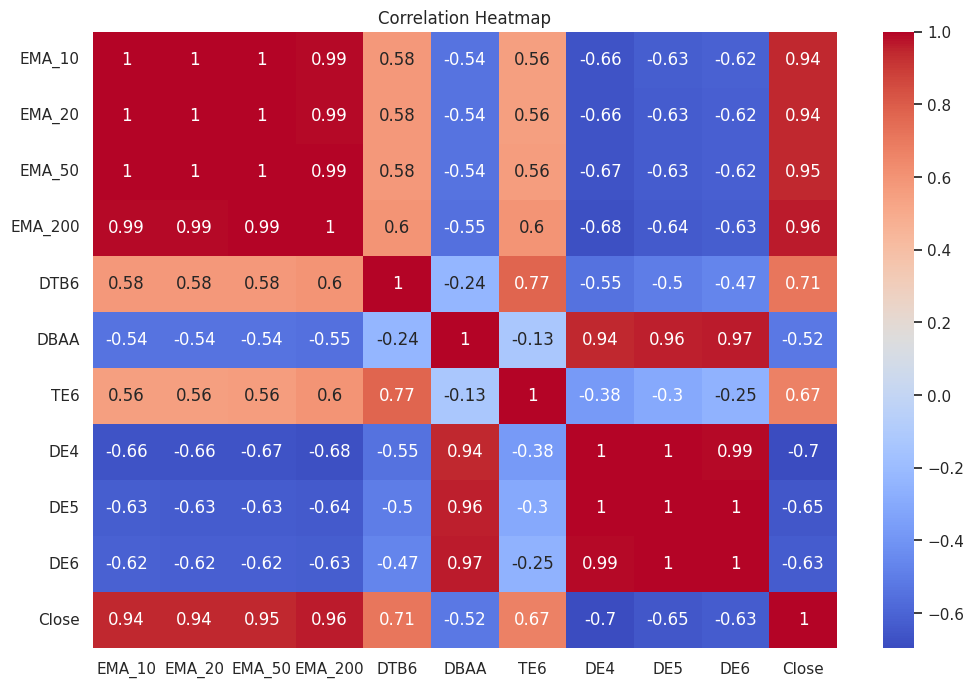

In [ ]:
# Compute the correlation matrix
corr_matrix = selected_data[['EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB6', 'DBAA', 'TE6', 'DE4', 'DE5', 'DE6', 'Close']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## *After observing the Heatmap, the final features for 'Close' prediction will be- EMA_20, DTB6, DBAA, TE6, DE4* ##

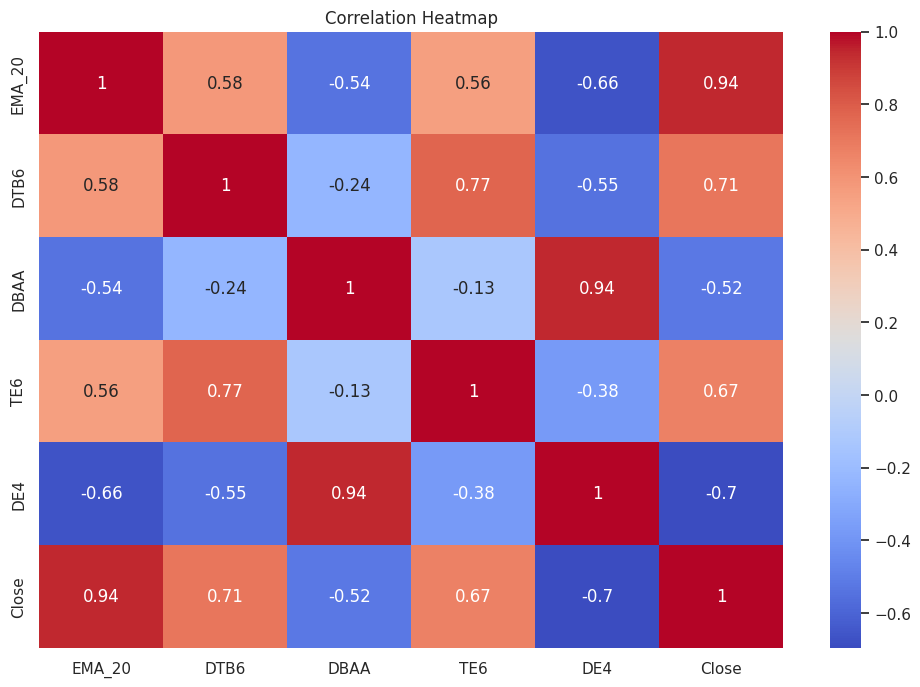

In [ ]:
# Compute the correlation matrix
corr_matrix = selected_data[['EMA_20', 'DTB6', 'DBAA', 'TE6', 'DE4','Close']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
selected_data.head()

,EMA_10,EMA_20,EMA_50,EMA_200,DTB6,DBAA,TE6,DE4,DE5,DE6,Close
0,2434.081342,2400.444582,2334.948907,2297.772346,0.17,5.74,0.03,5.57,5.60,5.60,2436.949951
1,2438.733811,2406.085091,2339.839927,2299.383267,0.18,5.77,0.05,5.59,5.64,5.64,2457.389893
2,2462.081608,2427.790232,2356.755919,2304.994319,0.18,5.80,0.04,5.62,5.66,5.66,2459.669922
3,2469.568590,2434.977830,2362.501177,2306.967112,0.18,5.84,0.04,5.66,5.70,5.70,2497.290039
4,2494.813306,2461.135875,2384.855185,2315.060752,0.16,5.71,0.03,5.55,5.58,5.58,2503.260010


In [ ]:
final_data = selected_data[[ 'EMA_20', 'DE4','DTB6', 'TE6', 'Close', 'DBAA']]


In [ ]:
final_data.shape

(767, 6)

In [ ]:
final_data.head()

,EMA_20,DE4,DTB6,TE6,Close,DBAA
0,2400.444582,5.57,0.17,0.03,2436.949951,5.74
1,2406.085091,5.59,0.18,0.05,2457.389893,5.77
2,2427.790232,5.62,0.18,0.04,2459.669922,5.80
3,2434.977830,5.66,0.18,0.04,2497.290039,5.84
4,2461.135875,5.55,0.16,0.03,2503.260010,5.71


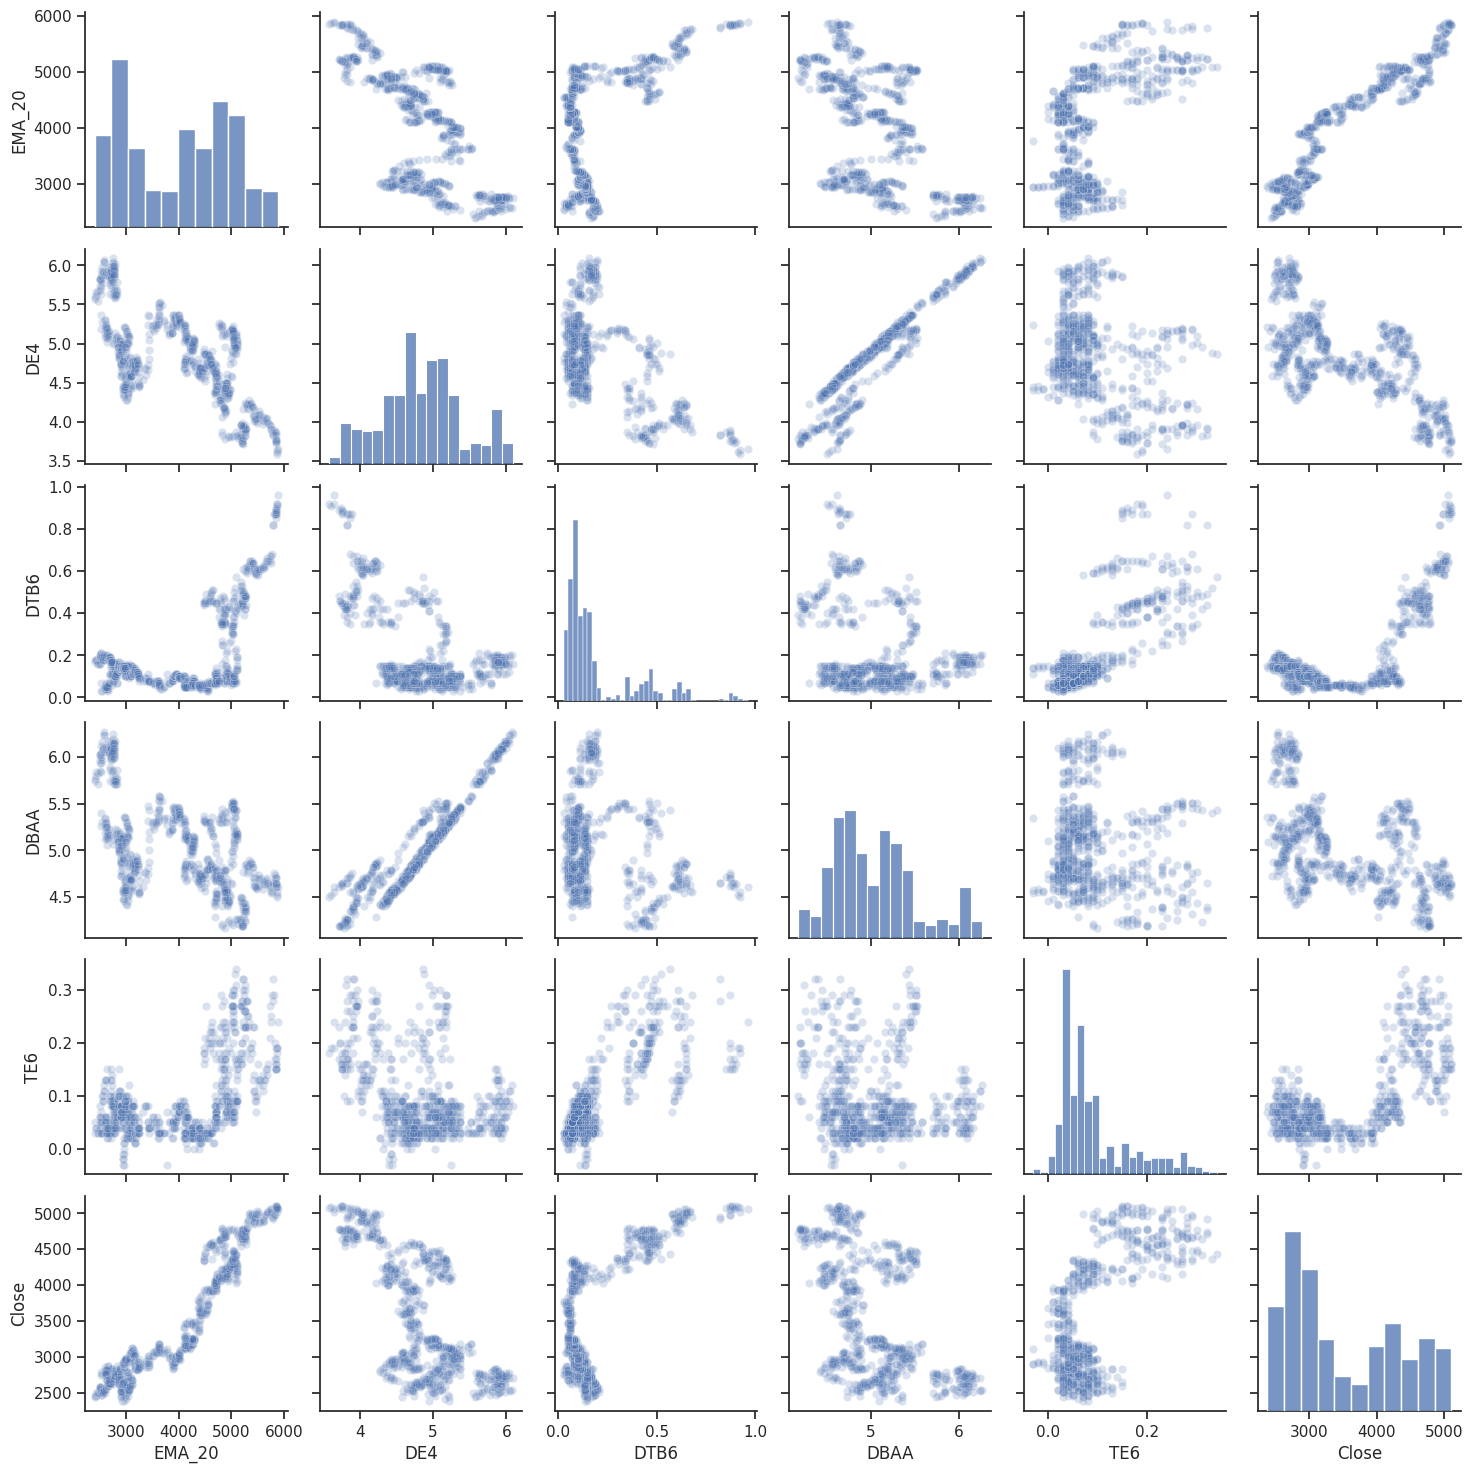

In [ ]:
selected_features = [ 'EMA_20', 'DE4', 'DTB6', 'DBAA', 'TE6', 'Close']
sns.set(style="ticks")
sns.pairplot(final_data[selected_features], kind="scatter", plot_kws={"alpha": 0.2})
plt.show()


## *Splitting of the data for model creation* ##

In [ ]:
from sklearn.model_selection import train_test_split

selected_features =  ['EMA_20', 'TE6' ,'DTB6', 'DBAA', 'DE4']
target_variable = 'Close'

X = final_data[selected_features]
y = final_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((613, 5), (613,))

In [ ]:
X_test.shape, y_test.shape

((154, 5), (154,))

In [ ]:
X_train.head()

,EMA_20,TE6,DTB6,DBAA,DE4
60,2760.389320,0.10,0.14,6.03,5.89
554,5023.271534,0.05,0.07,4.94,4.87
346,3945.994820,0.04,0.11,5.34,5.23
294,3441.714687,0.03,0.08,5.00,4.92
231,2971.860178,0.08,0.14,4.60,4.46


In [ ]:
X_train.describe()

,EMA_20,TE6,DTB6,DBAA,DE4
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,3994.587689,0.090522,0.201697,5.035334,4.833638
std,994.732889,0.073068,0.193485,0.472897,0.553344
min,2400.444582,-0.030000,0.030000,4.190000,3.580000
25%,2973.298253,0.040000,0.080000,4.690000,4.490000
50%,4140.056685,0.070000,0.120000,4.940000,4.800000
75%,4881.361607,0.110000,0.190000,5.300000,5.160000
max,5893.923640,0.340000,0.960000,6.250000,6.090000


## *We are going to Scale our data using Standard Scaler for fitting and transforming the data* ##

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can also access the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 41695.14917980157
Coefficients: [ 6.13760164e+02  7.42199436e+01 -2.54913226e+15  6.23035067e+15
 -7.29022416e+15]
Intercept: 3513.880200657996


In [ ]:
from sklearn.metrics import accuracy_score as accuracy,r2_score, f1_score, mean_absolute_error
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# # Calculate R-squared (R^2) to measure the goodness of fit
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Root Mean Squared Error (RMSE): 204.19390093683398
Mean Absolute Error (MAE): 170.75331681202616
R-squared (R^2): 0.9355988603844345


## **The coefficients of EMA_20 is 6.13760164e+02, TE6 is 7.49538043e+01, DTB6 is -2.43005940e+15, DBAA is 5.93932392e+15 and DE4 is -6.94968952e+15** ##

## **The value of Mean Squared Error : 41695.14917980157** ##

## **The value of Root Mean Squared Error (RMSE) : 204.19390093683398** ##

## **The value of Mean Absolute Error (MAE): 170.75331681202616** ##

## **The value of R-squared (R^2): 0.9355988603844345** ##

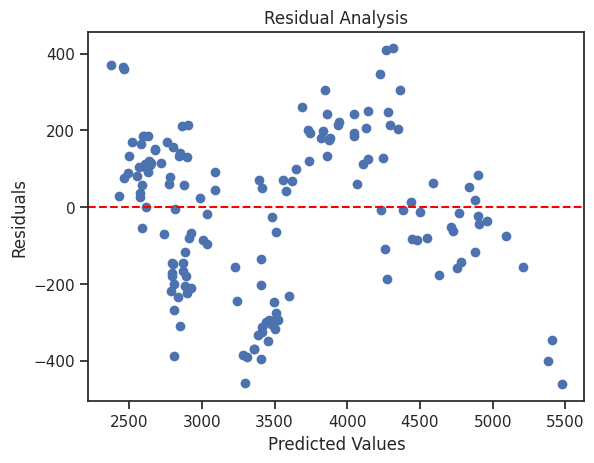

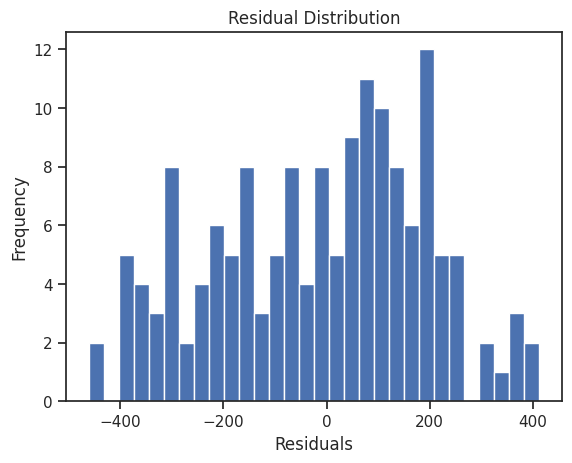

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of predicted vs. residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Create a histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## *In a Q-Q plot, if the residuals are normally distributed, the points should closely follow a straight line. Any deviations from the straight line can indicate departures from normality. Look for patterns such as points curving away from the line, which might indicate non-normality in the residuals.* ##

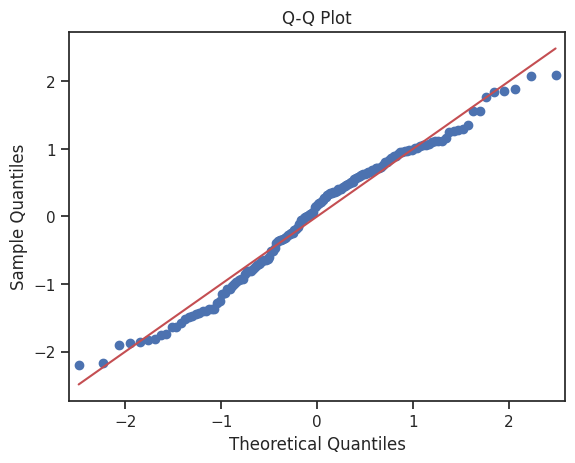

In [ ]:
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred

# Create a Q-Q plot
sm.qqplot(residuals, line='s', fit=True)

# Add labels and title
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")

# Display the plot
plt.show()

## **Insights of the project** ##

**Root Mean Squared Error (RMSE)**: RMSE is approximately 203.85, which means, on average, our model's predictions are off by around 203.85 units from the actual values.

**Mean Absolute Error (MAE):** MAE is another measure of the prediction error. It represents the average absolute difference between our model's predictions and the actual values. In our case, the MAE is approximately 171.22.

**R-squared (R^2):** R-squared is a measure of how well our model fits the data. 0.94 suggests that our model explains about 94% of the variance in the target variable, which is quite good.

**Mean Squared Error (MSE):** MSE is similar to RMSE but not rooted, so it gives higher weight to large errors. our MSE is approximately 41,554.85.